### MNIST Classification with Simple Neural Network

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

#### 1. Load and prepare the MNIST dataset

Reminder that the popular MNIST dataset consists of 60,000 samples of digits. Each sample is a 28x28 grayscale image with values between 0 and 255. We also have access to 10,000 supplementary samples for the final testing of the trained model.The preprocessing here consists of normalizing the samples in order to get intensities between 0 and 1.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28)


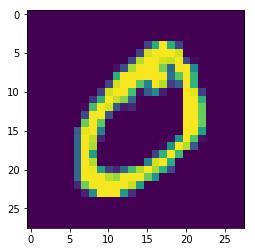

In [4]:
print(x_train.shape)
plt.imshow(x_train[1,:,:])

(10000, 28, 28)


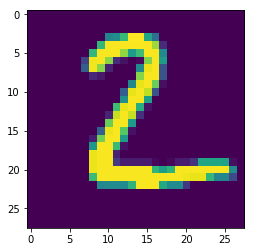

In [6]:
print(x_test.shape)
plt.imshow(x_test[1,:,:])

In [19]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)])

In [30]:
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


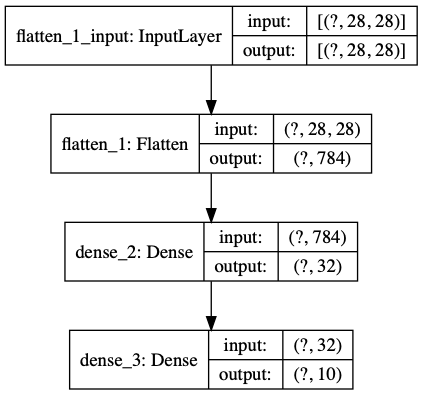

In [31]:
tf.keras.utils.plot_model(model1,show_shapes=True)

In [21]:
# Set the 2 important parameters for the training

optimizer = tf.keras.optimizers.Adam() # examples: 'Adam', 'RMSprop', 'Adagrad'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # examples: 'BinaryCrossentropy', 'CategoricalCrossentropy', '', '', ''
metrics = ['accuracy']



In [22]:
#predictions = model1(x_train[:1]).numpy()
#predictions

In [23]:
#tf.nn.softmax(predictions).numpy()

In [24]:
model1.compile(optimizer, loss, metrics)

In [25]:
model1_history = model1.fit(x=x_train, y=y_train, batch_size=32,epochs=15,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 5s 110us/sample - loss: 0.4231 - accuracy: 0.8824 - val_loss: 0.2541 - val_accuracy: 0.9278
Epoch 2/15
42000/42000 [==============================] - 3s 81us/sample - loss: 0.2104 - accuracy: 0.9397 - val_loss: 0.1941 - val_accuracy: 0.9447
Epoch 3/15
42000/42000 [==============================] - 3s 80us/sample - loss: 0.1624 - accuracy: 0.9531 - val_loss: 0.1720 - val_accuracy: 0.9514
Epoch 4/15
42000/42000 [==============================] - 3s 83us/sample - loss: 0.1355 - accuracy: 0.9600 - val_loss: 0.1621 - val_accuracy: 0.9520
Epoch 5/15
42000/42000 [==============================] - 3s 83us/sample - loss: 0.1164 - accuracy: 0.9655 - val_loss: 0.1478 - val_accuracy: 0.9571
Epoch 6/15
42000/42000 [==============================] - 3s 83us/sample - loss: 0.1030 - accuracy: 0.9701 - val_loss: 0.1400 - val_accuracy: 0.9598
Epoch 7/15
42000/42000 [==============================]

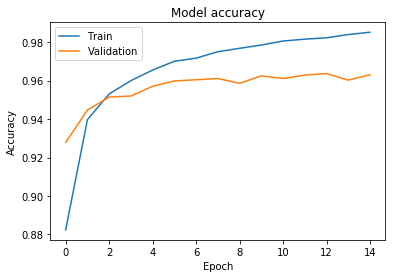

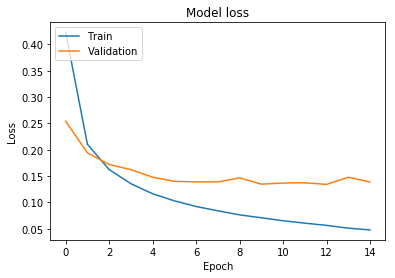

In [27]:
# Plot training & validation accuracy values
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()